<a href="https://colab.research.google.com/github/beliaazzhr/CaseBased-2-Algoritma-Unsupervised/blob/main/Case_Based_2_1301200048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anyelir Belia Azzahra

1301200048

IF-44-08

In [ ]:
#import library

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from copy import deepcopy

In [ ]:
data = pd.read_csv('Country-data.csv', index_col=0)
#menampilkan dataset
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#untuk menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


[]

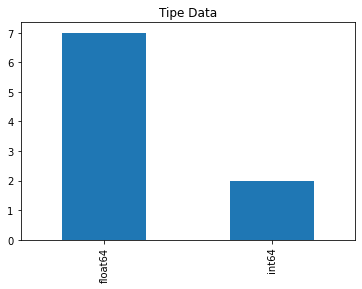

In [ ]:
tipe = data.dtypes.value_counts()
tipe = tipe.plot.bar()
tipe.set_title("Tipe Data")
tipe.plot()

In [ ]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


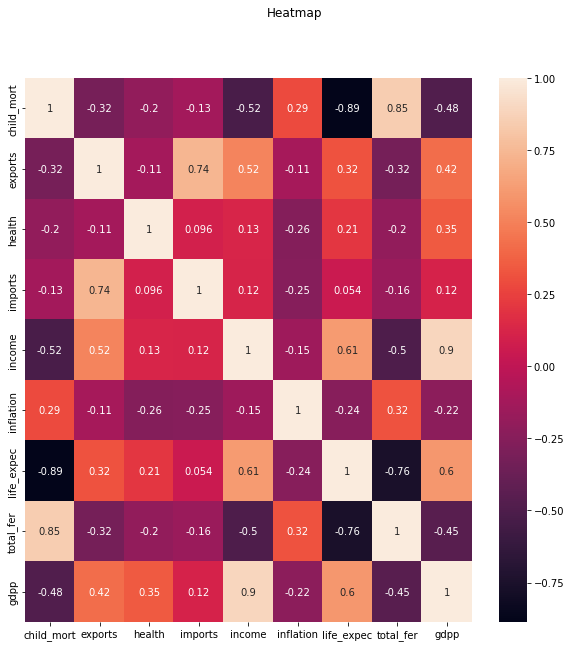

In [ ]:
#membuat heatmap/korelasi
corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize = (10,10))
plt.suptitle("Heatmap")

#plot heat map
data1 = sns.heatmap(data[top_corr_features].corr(), annot=True)

In [ ]:
data12 = data[['exports','imports','child_mort','life_expec','total_fer']]
print(data12)

                     exports  imports  child_mort  life_expec  total_fer
country                                                                 
Afghanistan             10.0     44.9        90.2        56.2       5.82
Albania                 28.0     48.6        16.6        76.3       1.65
Algeria                 38.4     31.4        27.3        76.5       2.89
Angola                  62.3     42.9       119.0        60.1       6.16
Antigua and Barbuda     45.5     58.9        10.3        76.8       2.13
...                      ...      ...         ...         ...        ...
Vanuatu                 46.6     52.7        29.2        63.0       3.50
Venezuela               28.5     17.6        17.1        75.4       2.47
Vietnam                 72.0     80.2        23.3        73.1       1.95
Yemen                   30.0     34.4        56.3        67.5       4.67
Zambia                  37.0     30.9        83.1        52.0       5.40

[167 rows x 5 columns]


In [ ]:
data12.isna().sum()

exports       0
imports       0
child_mort    0
life_expec    0
total_fer     0
dtype: int64

In [ ]:
#mengecek null -> tidak ada data yang null
data12.isnull().sum()

exports       0
imports       0
child_mort    0
life_expec    0
total_fer     0
dtype: int64

In [ ]:
data12.dropna().sum()

exports        6603.7740
imports        7658.9659
child_mort     6295.6000
life_expec    11800.8500
total_fer       491.8275
dtype: float64

In [ ]:
#mengecek data duplikat -> tidak ada data yang duplikat
data12.duplicated().sum()

0

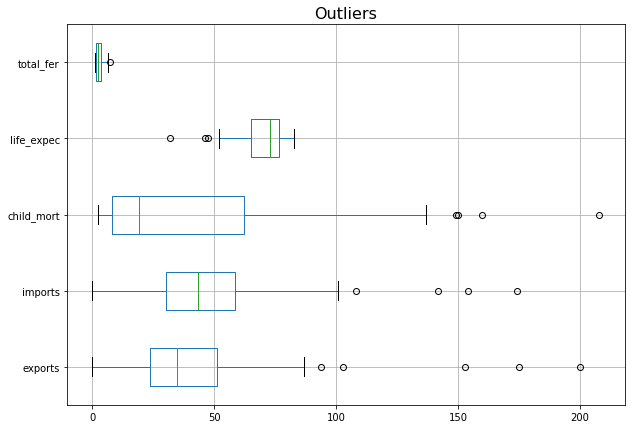

In [ ]:
#mengecek outliers
cont=data12.dtypes[(data12.dtypes!='object')].index #assign data12 per index
plt.figure(figsize=(10,7)) #bikin plot
data12[cont].boxplot(vert=0) #bikin bloxpot nya
plt.title('Outliers',fontsize=16)
plt.show()

In [ ]:
'''#menghitung jarak interquartile

def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum'''

'#menghitung jarak interquartile\n\ndef interquartile(data,x):\n  q1 = (data[x]).quantile(0.25)\n  q3 = (data[x]).quantile(0.75) \n  iqr = q3 - q1\n  maximum = q3 + (1.5 *iqr)\n  minimum = q1 - (1.5 *iqr)\n  return maximum,minimum'

In [ ]:
#menghitung jarak interquartile
def interquartile(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in data12[cont].columns:
    print(column)
    lr,ur=interquartile(data12[column])
    data12[column]=np.where(data12[column]>ur,ur,data12[column])
    data12[column]=np.where(data12[column]<lr,lr,data12[column])

exports
imports
child_mort
life_expec
total_fer


<ipython-input-16-fd0ee78f7672>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data12[column]=np.where(data12[column]>ur,ur,data12[column])
<ipython-input-16-fd0ee78f7672>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data12[column]=np.where(data12[column]<lr,lr,data12[column])


In [ ]:
"""menggantikan value outliners dengan hasil dari perhitungan jarak interquartile

def sub_outliners(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data"""

"menggantikan value outliners dengan hasil dari perhitungan jarak interquartile\n\ndef sub_outliners(data,x,maximum,minimum):\n  more_than = (data[x] > maximum)\n  less_than = (data[x] < minimum)\n  print('more_than: ',more_than,' | less_than: ',less_than)\n  data[x] = data[x].mask(more_than, maximum,axis=0)\n  data[x] = data[x].mask(less_than, minimum,axis=0)\n  return data"

In [ ]:
'''maximum,minimum = interquartile(data,'gdpp')
data = sub_outliners(data,'gdpp',maximum,minimum)

maximum,minimum = interquartile(data,'income')
data = sub_outliners(data,'income',maximum,minimum)'''

"maximum,minimum = interquartile(data,'gdpp')\ndata = sub_outliners(data,'gdpp',maximum,minimum)\n\nmaximum,minimum = interquartile(data,'income')\ndata = sub_outliners(data,'income',maximum,minimum)"

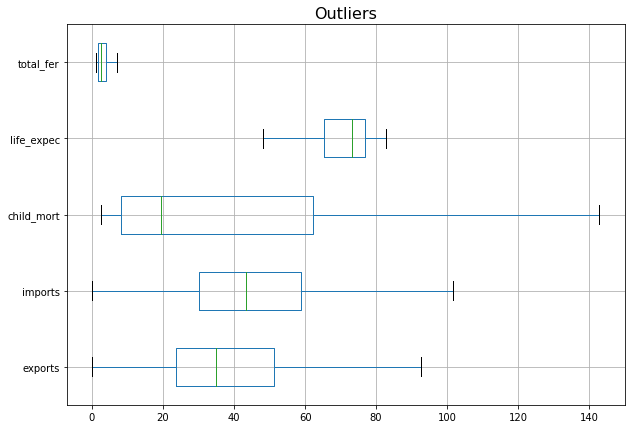

In [ ]:
#mengecek outliers setelah handling outliers
cont=data12.dtypes[(data12.dtypes!='object')].index #assign data12 per index
plt.figure(figsize=(10,7)) #bikin plot
data12[cont].boxplot(vert=0) #bikin bloxpot nya
plt.title('Outliers',fontsize=16)
plt.show()

In [ ]:
#Scalling
#untuk penyeragaman skala antar atribut (Normalisasi)
scale = StandardScaler()
scale.fit(data12)
temp =scale.transform(data12)
data_baru = pd.DataFrame(temp, index=data12.index, columns=data12.columns)

data_baru


,exports,imports,child_mort,life_expec,total_fer
country,,,,,
Afghanistan,-1.391107,-0.047444,1.369802,-1.702225,1.915276
Albania,-0.543547,0.135021,-0.550464,0.663321,-0.862779
Algeria,-0.053846,-0.713196,-0.271295,0.686859,-0.036691
Angola,1.071524,-0.146074,2.121210,-1.243238,2.141784
Antigua and Barbuda,0.280469,0.642965,-0.714835,0.722166,-0.543003
...,...,...,...,...,...
Vanuatu,0.332264,0.337212,-0.221723,-0.901941,0.369691
Venezuela,-0.520004,-1.393742,-0.537419,0.557401,-0.316495
Vietnam,1.528265,1.693373,-0.375657,0.286717,-0.662919


[[ 3.13047778e+00  1.64852551e-01]
 [-9.51800577e-01 -6.34081488e-01]
 [-3.80755280e-01 -7.82445614e-01]
 [ 2.62466165e+00  1.59221561e+00]
 [-1.26753152e+00  2.24634010e-01]
 [-2.63990027e-01 -1.97278463e+00]
 [-5.89961029e-01 -8.49782988e-01]
 [-9.97572863e-01 -2.05220670e+00]
 [-1.81748696e+00 -2.32564121e-01]
 [-2.52786218e-01 -5.62959903e-01]
 [-8.29646358e-01 -5.35049602e-01]
 [-1.53595399e+00  6.13159913e-01]
 [ 5.47431634e-01 -1.51554460e+00]
 [-1.14522737e+00 -3.24274158e-01]
 [-1.31188360e+00  6.81844418e-01]
 [-2.26617409e+00  1.48748676e+00]
 [-7.94241775e-01  7.89149499e-01]
 [ 2.77407434e+00  1.51704969e-01]
 [-4.83874913e-01  8.94696182e-01]
 [ 2.37261682e-01 -3.26109374e-01]
 [-1.29260414e+00 -5.91097428e-01]
 [ 9.10793782e-01  7.74031459e-01]
 [-1.26407078e-01 -2.33928218e+00]
 [-1.45347640e+00 -3.28278104e-01]
 [-1.30171825e+00  1.66426199e-01]
 [ 3.40560458e+00 -5.09873799e-02]
 [ 3.31055171e+00 -4.82815198e-02]
 [ 4.77311244e-03  1.05117216e+00]
 [ 3.03462203e+00 -1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y')

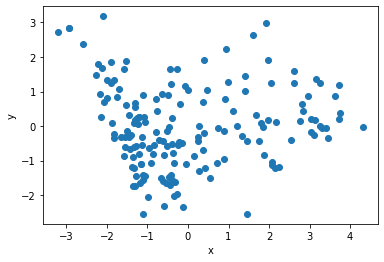

In [ ]:
#PCA
#dekomposisi kolom dipakai, menampilkan penyebaran data
test = PCA(n_components=2)
data_cluster = test.fit_transform(data_baru)
data_cluster = pd.DataFrame(data = data_cluster, columns = ['x', 'y'])
data_cluster

arrayScal = np.array(list(zip(data_cluster['x'], data_cluster['y'])))
print(arrayScal)

x=arrayScal[:,0]
y=arrayScal[:,1]
sns.scatterplot(x, y, s=5, color='grey')

plt.scatter(data_cluster['x'], data_cluster['y'])
plt.xlabel('x')
plt.ylabel('y')

## K-MEANS


[[-1  0]
 [ 0 -1]
 [ 2  0]]


0.0    76
2.0    47
1.0    44
Name: Cluster, dtype: int64

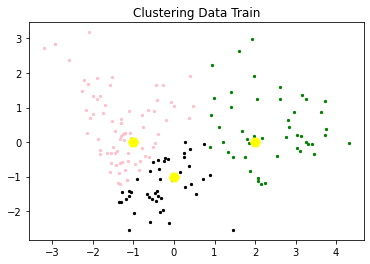

In [ ]:
"""# PEMODELAN"""

#menghitung jarak euclidean
def euclid(a, b, ax=1):
    kurang = a-b
    result_euclid = np.linalg.norm(kurang, axis=ax)
    return result_euclid

#menampilkan nilai centroid
k = 3 #banyaknya centroid
def centro(arrayScal,k):
  min = np.min(arrayScal)
  max = np.max(arrayScal)

#untuk mendapatkan nilai centroid
  centro1 = np.random.randint(min, max, size=k)
  centro2 = np.random.randint(min, max, size=k)
  centroid = np.array(list(zip(centro1, centro2)))
  return centroid

#mengambil panjang dari arrayscal
arrCluster = np.zeros(len(arrayScal))
#mendapatkan nilai centroid
centroid = centro(arrayScal,k)
#array centroid dengan cara mengambil shaping dari nilai centroid
arrC = np.zeros(centroid.shape)
#list kosong untuk variable baru
titik = []
temp = []

#memanggil fungsi euclid
mark = euclid(centroid, arrC, None)

while mark != 0:
    for i in range(len(arrayScal)):
        jarak = euclid(arrayScal[i], centroid) 
        cluster = np.argmin(jarak) 
        arrCluster[i] = cluster 
    arrC = deepcopy(centroid) #memanggil nilai centroid


    for i in range(k): 
        titik = [arrayScal[j] for j in range(len(arrayScal)) if arrCluster[j] == i] 
        centroid[i] = np.mean(titik, axis=0) 
        temp.append(arrCluster)

    mark = euclid(centroid, arrC, None)

fig, ax = plt.subplots()
warna = ['pink', 'black', 'green', 'gold', 'silver', 'navy', 'red']

#menampilkan plot
for i in range(k):
        titik = np.array([arrayScal[j] for j in range(len(arrayScal)) if arrCluster[j] == i])
        x = titik[:, 0]
        y = titik[:, 1]
        ax.scatter(x, y, s=5, c=warna[i])

clusterx = centroid[:, 0]
clustery = centroid[:, 1]        
ax.scatter(clusterx, clustery, marker='H', s=100, color='yellow')
plt.title("Clustering Data Train")
plt.show

print(centroid)

data["Cluster"] = arrCluster
data
#menampilkan value nya
data['Cluster'].value_counts()

## Evaluasi


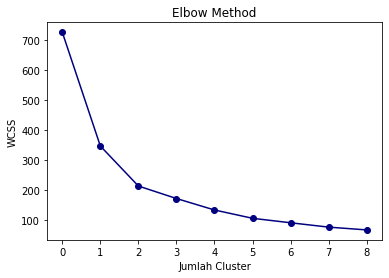

DataFrame is written successfully to Excel File.


In [ ]:
"""# EVAL"""

data_cluster



from sklearn.cluster import KMeans
wcss=[]
for n in range(1,10):
    km = KMeans(n_clusters= n, init='k-means++', random_state=50)
    km.fit(data_cluster)
    wcss.append(km.inertia_)
plt.plot(wcss,color= 'navy', marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

"""# OUTPUT"""

# menyimpan data ke dalam excel
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
data.sort_values(by='Cluster', ascending=False).to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

evaluasi : berdasarkan elbow method jumlah cluster yang diambil dan optimal adalah 2. karena k = 2 merupakan nilai k yang paling nilai eror nya paling minimum dan tidak signifikan berbeda dengan nilai k lainnya